In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the API key.
from config import weather_api_key


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [5]:
import requests
from datetime import datetime
from config import weather_api_key


In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:


# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kenai
Processing Record 2 of Set 1 | pangai
Processing Record 3 of Set 1 | kamaishi
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | okhotsk
Processing Record 6 of Set 1 | tilichiki
Processing Record 7 of Set 1 | belmonte
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | mulege
Processing Record 11 of Set 1 | mahanje
Processing Record 12 of Set 1 | sisimiut
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | hovd
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | mahebourg
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | tasiilaq
Processing Record 22 of Set 1 | sao jose da coroa grande
Processing Record

Processing Record 34 of Set 4 | riyadh
Processing Record 35 of Set 4 | saint george
Processing Record 36 of Set 4 | samusu
City not found. Skipping...
Processing Record 37 of Set 4 | ibra
Processing Record 38 of Set 4 | halifax
Processing Record 39 of Set 4 | cidreira
Processing Record 40 of Set 4 | bambari
Processing Record 41 of Set 4 | aksu
Processing Record 42 of Set 4 | halalo
City not found. Skipping...
Processing Record 43 of Set 4 | meyungs
City not found. Skipping...
Processing Record 44 of Set 4 | vanimo
Processing Record 45 of Set 4 | los llanos de aridane
Processing Record 46 of Set 4 | cottage grove
Processing Record 47 of Set 4 | ko samui
Processing Record 48 of Set 4 | yerbogachen
Processing Record 49 of Set 4 | quatre cocos
Processing Record 50 of Set 4 | barbosa
Processing Record 1 of Set 5 | fort morgan
Processing Record 2 of Set 5 | bougouni
Processing Record 3 of Set 5 | warman
Processing Record 4 of Set 5 | ludvika
Processing Record 5 of Set 5 | bonfim
Processing R

Processing Record 26 of Set 8 | cajaruro
Processing Record 27 of Set 8 | tiarei
Processing Record 28 of Set 8 | quibdo
Processing Record 29 of Set 8 | mwingi
Processing Record 30 of Set 8 | whyalla
Processing Record 31 of Set 8 | yiyang
Processing Record 32 of Set 8 | praia da vitoria
Processing Record 33 of Set 8 | krasnoarmeysk
Processing Record 34 of Set 8 | cockburn town
Processing Record 35 of Set 8 | ust-ilimsk
Processing Record 36 of Set 8 | lethem
Processing Record 37 of Set 8 | ahipara
Processing Record 38 of Set 8 | pingzhuang
Processing Record 39 of Set 8 | nishihara
Processing Record 40 of Set 8 | clearlake
Processing Record 41 of Set 8 | prescott
Processing Record 42 of Set 8 | constitucion
Processing Record 43 of Set 8 | america dourada
Processing Record 44 of Set 8 | ilebo
Processing Record 45 of Set 8 | fortuna
Processing Record 46 of Set 8 | vostok
Processing Record 47 of Set 8 | lavrentiya
Processing Record 48 of Set 8 | floro
Processing Record 49 of Set 8 | el alto
P

Processing Record 18 of Set 12 | saleilua
City not found. Skipping...
Processing Record 19 of Set 12 | vaitape
Processing Record 20 of Set 12 | zabolottya
City not found. Skipping...
Processing Record 21 of Set 12 | somerset east
Processing Record 22 of Set 12 | batemans bay
Processing Record 23 of Set 12 | jyvaskyla
Processing Record 24 of Set 12 | haflong
Processing Record 25 of Set 12 | bandar-e torkaman
City not found. Skipping...
Processing Record 26 of Set 12 | sayyan
Processing Record 27 of Set 12 | kayes
Processing Record 28 of Set 12 | charleville-mezieres
Processing Record 29 of Set 12 | nexo
Processing Record 30 of Set 12 | caninde
Processing Record 31 of Set 12 | paralimni
Processing Record 32 of Set 12 | boddam
Processing Record 33 of Set 12 | oussouye
Processing Record 34 of Set 12 | wukari
Processing Record 35 of Set 12 | shache
Processing Record 36 of Set 12 | tual
Processing Record 37 of Set 12 | conakry
Processing Record 38 of Set 12 | progreso
Processing Record 39 of

In [8]:
len(city_data)

592

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kenai,60.5544,-151.2583,40.14,96,1,6.91,US,2021-10-31 16:43:50
1,Pangai,-19.8000,-174.3500,76.28,79,9,16.89,TO,2021-10-31 16:43:50
2,Kamaishi,39.2667,141.8833,53.71,77,3,4.94,JP,2021-10-31 16:43:50
3,Okhotsk,59.3833,143.3000,9.81,71,0,16.80,RU,2021-10-31 16:43:51
4,Tilichiki,60.4667,166.1000,-6.18,97,23,11.95,RU,2021-10-31 16:43:51
5,Belmonte,-15.8631,-38.8828,84.20,62,55,9.10,BR,2021-10-31 16:43:52
6,Barrow,71.2906,-156.7887,24.82,86,90,24.16,US,2021-10-31 16:43:52
7,Ponta Do Sol,32.6667,-17.1000,76.71,77,37,7.09,PT,2021-10-31 16:43:52
8,Mulege,26.8833,-111.9833,81.45,29,51,2.13,MX,2021-10-31 16:43:53
9,Mahanje,-9.9333,35.3333,72.88,60,39,4.12,TZ,2021-10-31 16:43:53


In [10]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kenai,US,2021-10-31 16:43:50,60.5544,-151.2583,40.14,96,1,6.91
1,Pangai,TO,2021-10-31 16:43:50,-19.8000,-174.3500,76.28,79,9,16.89
2,Kamaishi,JP,2021-10-31 16:43:50,39.2667,141.8833,53.71,77,3,4.94
3,Okhotsk,RU,2021-10-31 16:43:51,59.3833,143.3000,9.81,71,0,16.80
4,Tilichiki,RU,2021-10-31 16:43:51,60.4667,166.1000,-6.18,97,23,11.95
5,Belmonte,BR,2021-10-31 16:43:52,-15.8631,-38.8828,84.20,62,55,9.10
6,Barrow,US,2021-10-31 16:43:52,71.2906,-156.7887,24.82,86,90,24.16
7,Ponta Do Sol,PT,2021-10-31 16:43:52,32.6667,-17.1000,76.71,77,37,7.09
8,Mulege,MX,2021-10-31 16:43:53,26.8833,-111.9833,81.45,29,51,2.13
9,Mahanje,TZ,2021-10-31 16:43:53,-9.9333,35.3333,72.88,60,39,4.12


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# 6.4.2

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
# Import linregress ### NOTE: added intent to the line below to remove error ###
    from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [13]:
index13 = city_data_df.loc[13]
index13

City                       Avarua
Country                        CK
Date          2021-10-31 16:43:54
Lat                      -21.2078
Lng                      -159.775
Max Temp                    73.45
Humidity                       73
Cloudiness                     40
Wind Speed                   9.22
Name: 13, dtype: object

In [14]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()
#southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kenai,US,2021-10-31 16:43:50,60.5544,-151.2583,40.14,96,1,6.91
2,Kamaishi,JP,2021-10-31 16:43:50,39.2667,141.8833,53.71,77,3,4.94
3,Okhotsk,RU,2021-10-31 16:43:51,59.3833,143.3000,9.81,71,0,16.80
4,Tilichiki,RU,2021-10-31 16:43:51,60.4667,166.1000,-6.18,97,23,11.95
6,Barrow,US,2021-10-31 16:43:52,71.2906,-156.7887,24.82,86,90,24.16


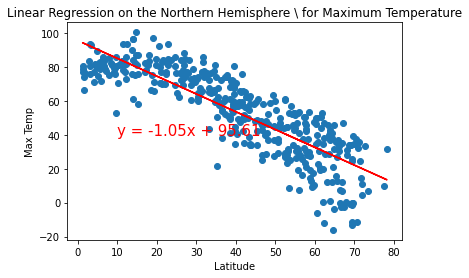

In [16]:
### copied the next 2 lines of code from above to eliminate error in this code ###


from scipy.stats import linregress
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp',(10,40))

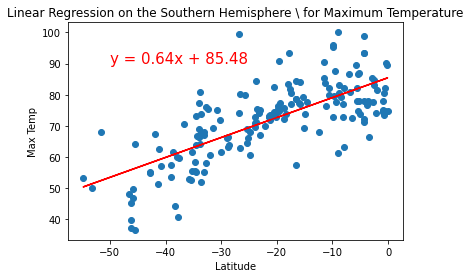

In [18]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for Maximum Temperature', 'Max Temp',(-50,90))

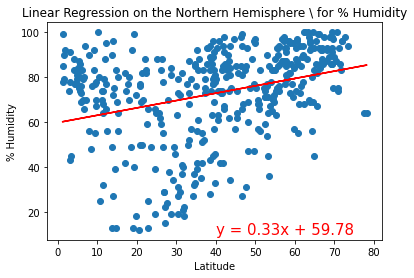

In [19]:
# 6.4.3

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for % Humidity', '% Humidity',(40,10))

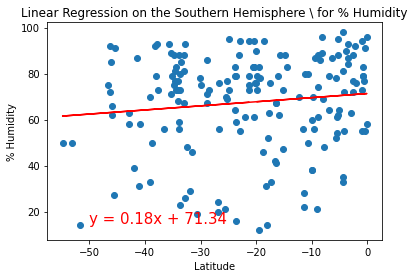

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for % Humidity', '% Humidity',(-50,15))


### Why do my titles not line up like in the module? ###

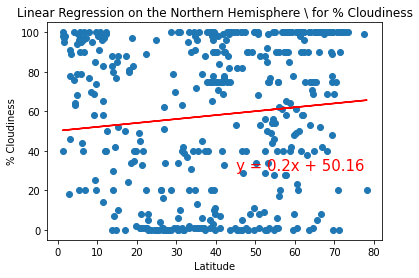

In [21]:
# 6.4.4

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(45,30))

### my chart has a slightly postive angle and the mod has a slightly negative angle ###

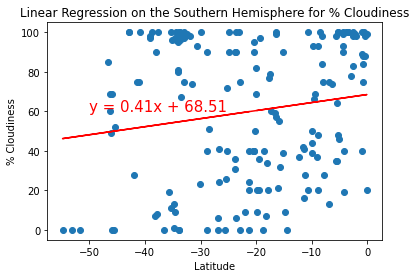

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

### my chart is positive, the books is slightly negative

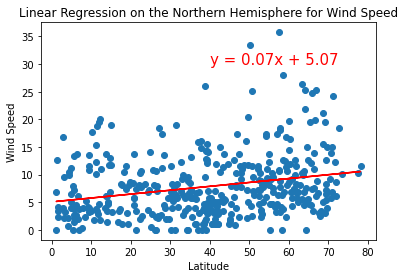

In [23]:
# 6.4.5

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,30))

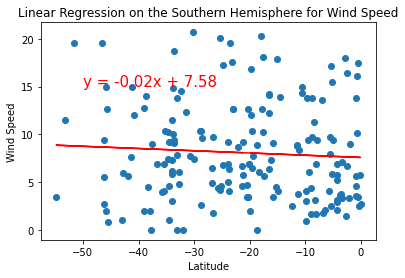

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,15))